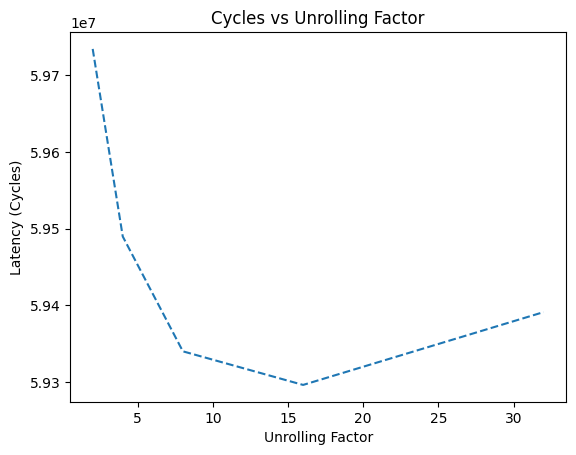

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([2, 4, 8, 16, 32])
ypoints = np.array([59734252, 59489841, 59340239, 59296471, 59391341])

plt.plot(xpoints, ypoints, linestyle = '--')
plt.title("Cycles vs Unrolling Factor")
plt.xlabel("Unrolling Factor")
plt.ylabel("Latency (Cycles)")
plt.show()

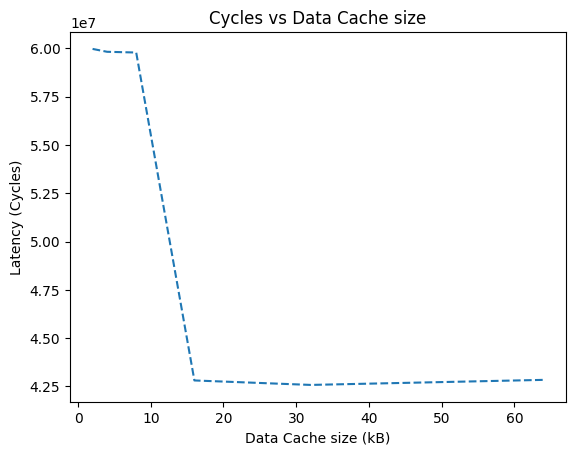

In [ ]:
xpoints = np.array([2, 4, 8, 16, 32, 64])
ypoints = np.array([59973394, 59824719, 59787087, 42811763, 42580473, 42842142])

plt.plot(xpoints, ypoints, linestyle = '--')
plt.title("Cycles vs Data Cache size")
plt.xlabel("Data Cache size (kB)")
plt.ylabel("Latency (Cycles)")
plt.show()

In [ ]:
!pip install paretoset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installat

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from paretoset import paretoset

Pareto Optimal Data:
     L1D  L1I   L2  Unrolling    Cycles  totalMemoryKB  latencyCC
2      2    2  128          8  59725456            132   59725456
23     2    4  128         16  59608257            134   59608257
44     2    8  128         32  59447087            138   59447087
143    4    4  128         16  59477547            136   59477547
164    4    8  128         32  59287222            140   59287222
284    8    8  128         32  59249179            144   59249179
362   16    2  128          8  42539600            146   42539600
383   16    4  128         16  42480342            148   42480342
404   16    8  128         32  42348777            152   42348777
482   32    2  128          8  42278590            162   42278590
503   32    4  128         16  42185703            164   42185703
524   32    8  128         32  41936302            168   41936302
544   32   16  128         32  41924727            176   41924727
549   32   16  256         32  41908054            304 

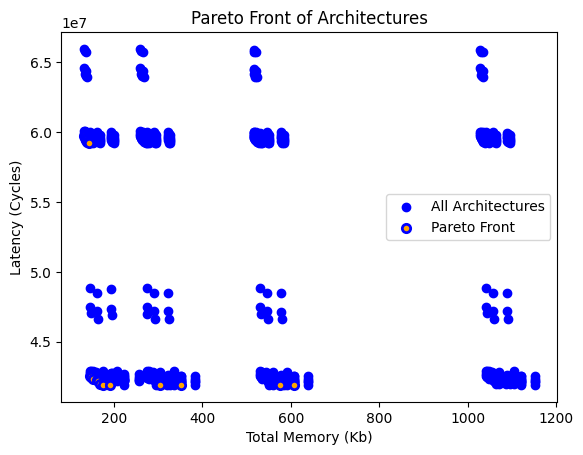

In [ ]:
data = pd.read_csv("results.csv")
data['L1D'] = data['L1D'].str.replace('kB', '').astype(int)
data['L1I'] = data['L1I'].str.replace('kB', '').astype(int)
data['L2'] = data['L2'].str.replace('kB', '').astype(int)

data['totalMemoryKB'] = data['L1D'] + data['L1I'] + data['L2']
data['latencyCC'] = data['Cycles']

mask = paretoset(data[['totalMemoryKB', 'latencyCC']], sense=["min", "min"])
paretoset_data = data[mask]

# Εκτύπωση και αποθήκευση των δεδομένων του Pareto Front
print("Pareto Optimal Data:")
print(paretoset_data)

paretofront_cropped = paretoset_data.drop(columns=['totalMemoryKB', 'latencyCC'])
paretofront_cropped['L1D'] = paretofront_cropped['L1D'].astype(str) + 'kB'
paretofront_cropped['L1I'] = paretofront_cropped['L1I'].astype(str) + 'kB'
paretofront_cropped['L2'] = paretofront_cropped['L2'].astype(str) + 'kB'
paretofront_cropped.to_csv("pareto_front.csv", index=False)

# Δημιουργία γραφήματος
plt.scatter(data['totalMemoryKB'], data['latencyCC'], color="blue", label="All Architectures")
plt.scatter(paretoset_data['totalMemoryKB'], paretoset_data['latencyCC'], color="orange", edgecolor="blue", linewidth=2, label="Pareto Front", marker="o")

# Ρυθμίσεις γραφήματος
plt.title("Pareto Front of Architectures")
plt.xlabel("Total Memory (Kb)")
plt.ylabel("Latency (Cycles)")
plt.legend()
plt.show()